Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [x] If you haven't completed assignment #1, please do so first.
- [x] Continue to clean and explore your data. Make exploratory visualizations.
- [x] Fit a model. Does it beat your baseline? 
- [x] Try xgboost.
- [x] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

## Practicing permutation importances

Since my current models are not very accurate, I'll try this on a different dataset.  That way I actually have some accuracy to lose, plus I get some practice with other data and models.

In [30]:
import pandas as pd

# Since I'm just grabbing some random dataset to practice, 
# I'll just grab an example one from sklearn

# This dataset was derived from the 1990 U.S. census, 
# using one row per census block group.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_X = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_y = housing.target

# The target variable is the median house value for California districts.
print("California housing target:", housing_y)
print(housing_X.shape)
housing_X.head()

California housing target: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [0]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(housing_X, housing_y)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# Set up a simple pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
score_before = mean_absolute_error(y_val, y_pred)
print('Default MAE', score_before)

Default MAE 0.5300296764989141


In [33]:
# Calculating permutation importance manually
# Note - during the lecture we did this with a classification problem
import numpy as np

# permute a column
feature = 'HouseAge'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

# get new score
y_pred = pipeline.predict(X_val_permuted)
score_permuted = mean_absolute_error(y_val, y_pred)

# compare results
print(f'Mean Absolute Error with {feature}: {score_before}')
print(f'Mean Absolute Error with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_permuted - score_before}')

Mean Absolute Error with HouseAge: 0.5300296764989141
Mean Absolute Error with HouseAge permuted: 0.5415858376519513
Permutation Importance: 0.011556161153037259


In [0]:
# Now to use a library for it
%%capture
!pip install eli5

In [35]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Fit model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Set up the library permuter
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_scaled, y_val)

PermutationImportance(cv='prefit',
                      estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                      n_iter=5, random_state=42, refit=True,
                      scoring='neg_mean_absolute_error')

In [8]:
# Display permutation importances
feature_names = X_val.columns.to_list()
eli5.show_weights(
    permuter,
    top=None,   # No limit, show importances for all features
    feature_names=feature_names
)

Weight,Feature
0.6490 ± 0.0358,Latitude
0.6411 ± 0.0130,Longitude
0.5088 ± 0.0159,MedInc
0.0361 ± 0.0018,AveBedrms
0.0291 ± 0.0024,AveRooms
0.0125 ± 0.0018,HouseAge
0.0008 ± 0.0001,AveOccup
-0.0000 ± 0.0001,Population


## My Project data

In [9]:
# I'm running this locally, files stored here
%cd LoL_project

C:\Users\thedo\LoL_project


In [0]:
# Import my own data (test is in another file)
import pandas as pd
train = pd.read_csv('LoL_train_cleaned.csv', index_col=0)
val = pd.read_csv('LoL_val_cleaned.csv', index_col=0)
champ_stats = pd.read_csv('champ_stats.csv', index_col=0)

In [11]:
print(train.shape)
train.head()

(36043, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
22656,3214824413,0,1274,9,2,2,2,2,0,2,...,10,2,0,2,1,Katarina,Yasuo,Lucian,Zac,Darius
17347,3214843995,2392998,2033,9,1,2,1,1,2,1,...,6,0,1,3,1,Zac,Camille,Galio,Draven,Xayah
9978,3214825708,3633614,2087,9,1,2,2,1,1,2,...,4,0,0,2,1,Vladimir,Ivern,Galio,Fizz,Fiora
34410,3214844763,4917497,2323,9,1,1,2,1,2,2,...,3,0,1,2,0,Zac,Fiora,Yasuo,Lulu,Fizz
10658,3214864950,6643444,1613,9,2,1,1,2,2,1,...,6,1,1,1,0,Zyra,Kassadin,Xayah,Katarina,Ivern


In [12]:
champ_stats.head()

,pick_count,ban_count,pick_rate,ban_rate,win_rate,dragon_kill_rate,baron_kill_rate
name,,,,,,,
Tristana,10982,10247,0.250925,0.234132,0.515025,1.398106,0.410126
Thresh,11197,5014,0.255838,0.114564,0.472895,1.401000,0.398857
Vayne,8916,7410,0.203720,0.169310,0.514581,1.369897,0.407470
Kayn,8204,14601,0.187451,0.333615,0.485982,1.281326,0.352511
Lee Sin,7929,5570,0.181168,0.127268,0.525918,1.460840,0.391222


### Feature Engineering

Some of this was done yesterday, adding to it now

In [0]:
# Since this has to calculate some things by individual rows, 
# it might take a bit to run

def engineer_features(X):
  """ returns X with new engineered features """
  X = X.copy()

  # calculating 8 new columns for each row:
  new_col = [.0] * len(X) # initialize with floats

  # average win rate for champs on each team (mean of win rates)
  X['t1_avg_win_rate'] = new_col
  X['t2_avg_win_rate'] = new_col

  # average ban rate for champs on each team 
  # (this is particularly interesting, since it tells how often 
  # the champs picked in this game were banned in others)
  X['t1_avg_ban_rate'] = new_col
  X['t2_avg_ban_rate'] = new_col

  # average kill rates for each team's champs of each monster
  X['t1_avg_dragon_kills'] = new_col
  X['t2_avg_dragon_kills'] = new_col
  X['t1_avg_baron_kills'] = new_col
  X['t2_avg_baron_kills'] = new_col

  for i in X.index:
    # extract team lists
    team1 = X.loc[i][['t1_champ1id', 't1_champ2id', 't1_champ3id', 
                      't1_champ4id', 't1_champ5id']]
    team2 = X.loc[i][['t2_champ1id', 't2_champ2id', 't2_champ3id', 
                      't2_champ4id', 't2_champ5id']]

    # average stats of the 5 champs on each team
    t1_stats = champ_stats.loc[team1].mean()
    X.at[i, 't1_avg_win_rate'] = t1_stats['win_rate']
    X.at[i, 't1_avg_ban_rate'] = t1_stats['ban_rate']
    X.at[i, 't1_avg_dragon_kills'] = t1_stats['dragon_kill_rate']
    X.at[i, 't1_avg_baron_kills'] = t1_stats['baron_kill_rate']

    t2_stats = champ_stats.loc[team2].mean()
    X.at[i, 't2_avg_win_rate'] = t2_stats['win_rate']
    X.at[i, 't2_avg_ban_rate'] = t2_stats['ban_rate']
    X.at[i, 't2_avg_dragon_kills'] = t2_stats['dragon_kill_rate']
    X.at[i, 't2_avg_baron_kills'] = t2_stats['baron_kill_rate']

  # Also find the difference between those average rates
  X['win_rate_diff'] = X['t1_avg_win_rate'] - X['t2_avg_win_rate']
  X['ban_rate_diff'] = X['t1_avg_ban_rate'] - X['t2_avg_ban_rate']
  X['dragon_diff'] = X['t1_avg_dragon_kills'] - X['t2_avg_dragon_kills']
  X['baron_diff'] = X['t1_avg_baron_kills'] - X['t2_avg_baron_kills']

  return X

In [14]:
%%time
# apply feature engineering
train = engineer_features(train)
val = engineer_features(val)

Wall time: 2min 7s


In [15]:
# view the new engineered columns
train[train.columns[-12:]].head()

,t1_avg_win_rate,t2_avg_win_rate,t1_avg_ban_rate,t2_avg_ban_rate,t1_avg_dragon_kills,t2_avg_dragon_kills,t1_avg_baron_kills,t2_avg_baron_kills,win_rate_diff,ban_rate_diff,dragon_diff,baron_diff
22656,0.517458,0.444778,0.191523,0.058082,1.397779,1.371932,0.392861,0.370357,0.072680,0.133441,0.025847,0.022504
17347,0.500740,0.507390,0.105721,0.016739,1.399765,1.399125,0.395659,0.407894,-0.006650,0.088982,0.000640,-0.012234
9978,0.513434,0.515845,0.020477,0.134095,1.424480,1.418066,0.387844,0.398913,-0.002411,-0.113618,0.006414,-0.011069
34410,0.477560,0.469466,0.105858,0.038962,1.396970,1.458763,0.399061,0.420391,0.008094,0.066897,-0.061793,-0.021330
10658,0.480455,0.528259,0.308034,0.118540,1.397505,1.324792,0.387148,0.392188,-0.047804,0.189494,0.072713,-0.005040


## Fit a model. Does it beat your baseline?

In [16]:
# Select features to use
target = 'winner'
columns = train.columns
champs_used = columns[columns.str.contains('id')].tolist()
champs_banned = (columns[columns.str.contains('t1_ban')].tolist() +
                 columns[columns.str.contains('t2_ban')].tolist())
spells_used = columns[columns.str.contains('sum')].tolist()
engineered = columns[-12:].tolist()

# Using all available pre-match data plus my engineered features (should be 52)
features = champs_used + champs_banned + spells_used + engineered
print('Number of features selected:', len(features))

Number of features selected: 52


In [0]:
# Split into X and y variables
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [18]:
# Start with a default decision tree
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier()
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.4897060727696491


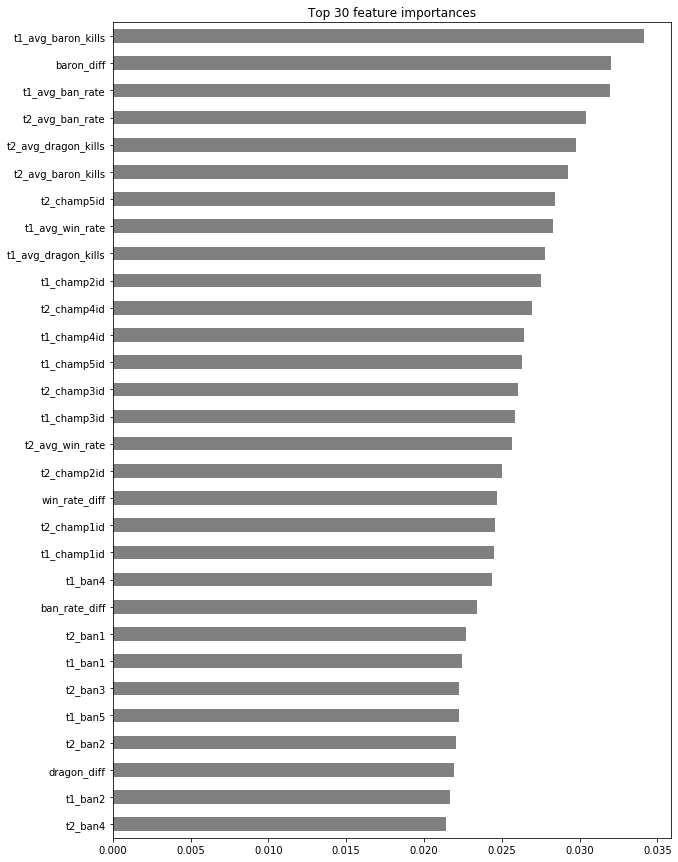

In [19]:
# Get and plot feature importances
model = pipeline.named_steps['decisiontreeclassifier']
importances = pd.Series(model.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} feature importances')
importances.sort_values()[-n:].plot.barh(color='grey');

## Try XGBoost

In [0]:
%%capture
conda install -c anaconda py-xgboost

In [21]:
# First I'll just naively try a default model
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_jobs=-3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))
# side note, this is my highest score up to this point

Validation Accuracy: 0.518710345720575


## Get your model's permutation importances

I still don't have high accuracy, but I'll try it anyway

In [22]:
# Encode X matrices
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Fit the model
model = XGBClassifier(n_jobs=-3)
model.fit(X_train_encoded, y_train)

# Fit the permuter
permuter = PermutationImportance(model, scoring='accuracy', 
                                 n_iter=5, random_state=42)
permuter.fit(X_val_encoded, y_val)

# Display permutation importances
feature_names = X_val.columns.to_list()
eli5.show_weights(
    permuter,
    top=None,   # No limit, show importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0075 ± 0.0070,baron_diff
0.0060 ± 0.0073,t2_avg_baron_kills
0.0038 ± 0.0037,ban_rate_diff
0.0025 ± 0.0035,t1_avg_ban_rate
0.0018 ± 0.0011,t1_champ4_sum1
0.0016 ± 0.0043,t1_champ3id
0.0016 ± 0.0039,t1_champ4id
0.0016 ± 0.0011,t1_ban3
0.0014 ± 0.0023,t2_ban1
0.0014 ± 0.0038,t2_champ3id


As I expected, none of my features have a high permutation importance, since none of them does much to predict the winner.  At least, not with the current encoding method and model I have.

## Trying other models

So far, I've really only worked on the features themselves.  There's still room for more engineering, but let's start exploring other ways of using what I already have.

### Random Forest

So far I've been using just a decision tree.  What will a random forest do?

In [23]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, n_jobs=-3)
)

pipeline.fit(X_train, y_train)
print('Random Forest validation accuracy:', pipeline.score(X_val, y_val))

Random Forest validation accuracy: 0.508481160170918


So random forest isn't any better, at least by default.  When I have more time, I want to revisit it with hyperparameter optimization.

### CatBoost

Today's lecture notebook mentioned [CatBoost](https://catboost.ai/), a model that can use categorical features without preprocessing.  I have a lot of those, so let's try it.

In [0]:
%%capture
conda install -c conda-forge catboost

In [25]:
from catboost import CatBoostClassifier

cat_features = champs_used + champs_banned + spells_used

# No need for a pipeline, this model is all I'm using
model = CatBoostClassifier(
    loss_function='Logloss',  # Logloss is default, also the best result I got
    custom_metric='Accuracy', # Accuracy is not an available loss function, use this to save accuracy scores (used in the visualization below)
    max_depth=6,              # default is 6
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,  # have to specify which features are categorical
    eval_set=(X_val, y_val),
    early_stopping_rounds=100,  # runs 1000 iterations if not stopped
)

Learning rate set to 0.076815
0:	learn: 0.6928565	test: 0.6929103	best: 0.6929103 (0)	total: 191ms	remaining: 3m 10s
1:	learn: 0.6925939	test: 0.6927549	best: 0.6927549 (1)	total: 254ms	remaining: 2m 6s
2:	learn: 0.6922063	test: 0.6926050	best: 0.6926050 (2)	total: 408ms	remaining: 2m 15s
3:	learn: 0.6919141	test: 0.6924902	best: 0.6924902 (3)	total: 552ms	remaining: 2m 17s
4:	learn: 0.6917261	test: 0.6924154	best: 0.6924154 (4)	total: 701ms	remaining: 2m 19s
5:	learn: 0.6914458	test: 0.6923044	best: 0.6923044 (5)	total: 847ms	remaining: 2m 20s
6:	learn: 0.6913338	test: 0.6922124	best: 0.6922124 (6)	total: 882ms	remaining: 2m 5s
7:	learn: 0.6910841	test: 0.6921207	best: 0.6921207 (7)	total: 1.01s	remaining: 2m 5s
8:	learn: 0.6908396	test: 0.6920760	best: 0.6920760 (8)	total: 1.16s	remaining: 2m 7s
9:	learn: 0.6906133	test: 0.6919820	best: 0.6919820 (9)	total: 1.29s	remaining: 2m 7s
10:	learn: 0.6904384	test: 0.6919667	best: 0.6919667 (10)	total: 1.43s	remaining: 2m 8s
11:	learn: 0.6902

Note: CatBoost uses "logloss" score by default, instead of accuracy, so it optimises for that.

In [26]:
score = model.score(X_val, y_val)
print("Best CatBoost accuracy score:", score)

Best CatBoost accuracy score: 0.5233717467305451


So using default hyperparameters CatBoost beats both Random Forest and XGBoost models.  Even if only by 1-2%.

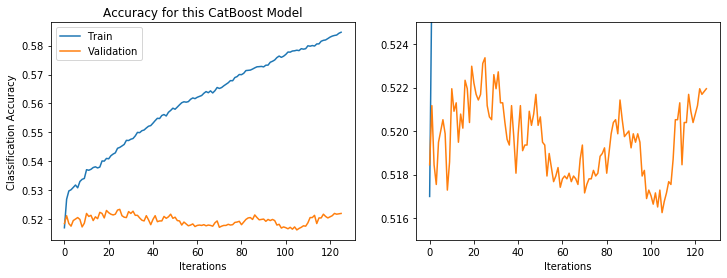

In [27]:
# Plot the accuracy, like we did for XGBoost in the lecture
train_error = model.get_evals_result()['learn']['Accuracy']
val_error = model.get_evals_result()['validation']['Accuracy']

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,4)

ax[0].plot(range(0,len(train_error)), train_error, label='Train')
ax[0].plot(range(0,len(val_error)), val_error, label='Validation')
ax[0].legend()
ax[0].set_title('Accuracy for this CatBoost Model')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Classification Accuracy');

# Zoomed in on val
ax[1].plot(range(0,len(train_error)), train_error, label='Train')
ax[1].plot(range(0,len(val_error)), val_error, label='Validation')
ax[1].set_xlabel('Iterations')
ax[1].set_ylim((.515,.525));